In [1]:
!pip install data-purifier

In [2]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 22.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
# importing packages

import datapurifier as dp
from datapurifier import Mleda
from datapurifier import Nlpeda
from datapurifier import Nlpurifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns


In [3]:
from google.colab import drive

drive.mount('/content/drive')

path_link = "/content/drive/My Drive/drugsComTrain_raw.tsv"
df_train = pd.read_csv(path_link,sep='\t')
path_link = "/content/drive/My Drive/drugsComTest_raw.tsv"
df_test = pd.read_csv(path_link,sep='\t')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df_train.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [ ]:
df = pd.concat([df_train,df_test])

In [ ]:
df.shape

(215063, 7)

Text(0.5, 1.0, 'Top20 : The number of drugs per condition.')

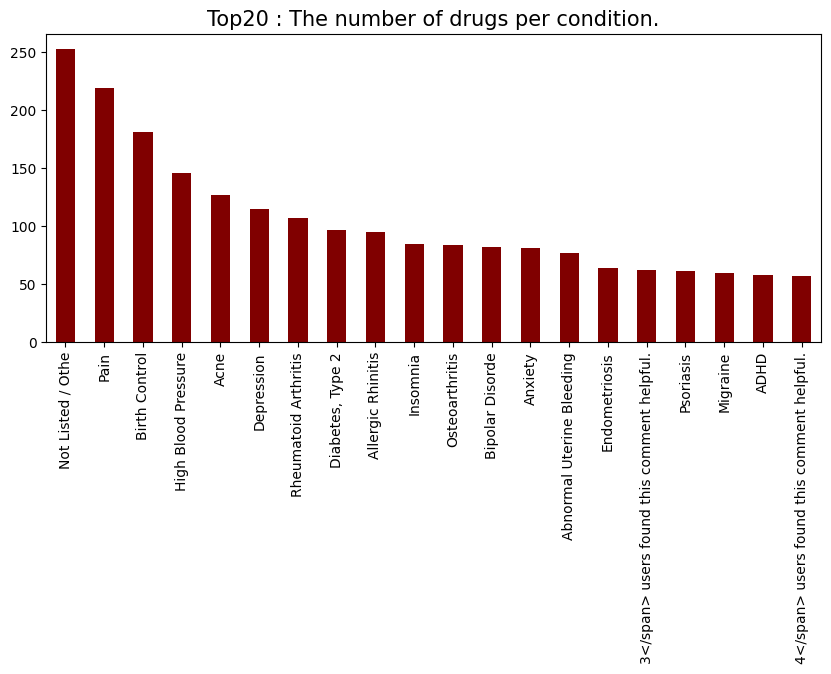

In [ ]:
condition_dn = df.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)
condition_dn[0:20].plot(kind="bar", figsize = (10,4), fontsize = 10,color="maroon")
plt.xlabel("", fontsize = 15)
plt.ylabel("", fontsize = 15)
plt.title("Top20 : The number of drugs per condition.", fontsize = 15)

Text(0.5, 1.0, 'Bottom20 : The number of drugs per condition.')

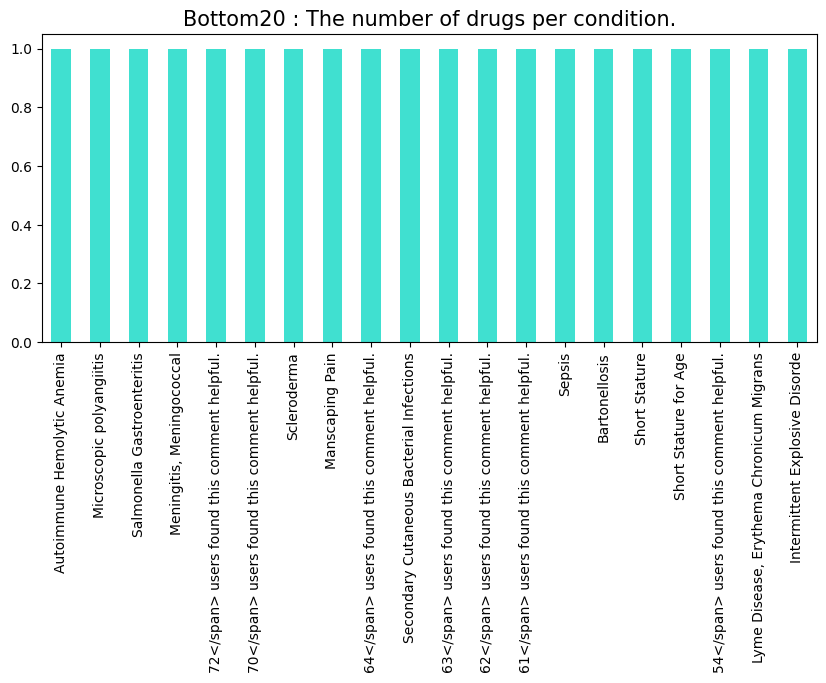

In [ ]:
condition_dn = df.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)

condition_dn[condition_dn.shape[0]-20:condition_dn.shape[0]].plot(kind="bar", figsize = (10,4), fontsize = 10,color="turquoise")
plt.xlabel("", fontsize = 15)
plt.ylabel("", fontsize = 15)
plt.title("Bottom20 : The number of drugs per condition.", fontsize = 15)

In [ ]:
import nltk
pure = Nlpurifier(df, "review")

GridspecLayout(children=(Checkbox(value=False, description='Drop Null Rows', indent=False, layout=Layout(grid_…


Convert Word to its Base Form


interactive(children=(RadioButtons(description='Technique:', options=('None', 'Stemming', 'Lemmatization'), va…

Remove Top Common Words


interactive(children=(Checkbox(value=False, description='Remove Top Common Words'), Output()), _dom_classes=('…

Remove Top Rare Words


interactive(children=(Checkbox(value=False, description='Remove Top Rare Words'), Output()), _dom_classes=('wi…

Button(description='Start Purifying', style=ButtonStyle())

Dataframe contains 215063 rows and 7 columns

Starting execution of 'lower' function, Please wait...
Finished execution of 'lower' function in 0.275 secs

Starting execution of 'remove_numbers' function, Please wait...
Finished execution of 'remove_numbers' function in 1.747 secs

Starting execution of 'remove_multiple_spaces' function, Please wait...
Finished execution of 'remove_multiple_spaces' function in 1.616 secs

Starting execution of 'remove_accented_chars' function, Please wait...
Finished execution of 'remove_accented_chars' function in 0.559 secs

Starting execution of 'remove_stop_words' function, Please wait...
Finished execution of 'remove_stop_words' function in 3.409 secs

Starting execution of 'remove_punctuations' function, Please wait...
Finished execution of 'remove_punctuations' function in 3.404 secs


Purifying Completed!

type <obj>.df to access processed and purified dataframe


# Lemmatization

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')

nltk.download('wordnet')
pure_df=pure.df

# Initializing the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to perform lemmatization on a sentence
def lemmatize_sentence(sentence):
    tokens = word_tokenize(sentence)  # Tokenize the sentence into words
    lemmatized_sentence = ' '.join([lemmatizer.lemmatize(word) for word in tokens])  # Lemmatize each word
    return lemmatized_sentence

# Applying lemmatization to the 'review' column
pure_df['review'] = pure_df['review'].apply(lambda x: lemmatize_sentence(x))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
google_drive_path = '/content/drive/My Drive/pure_df.csv'
pure_df.to_csv(google_drive_path, index=False)
print(f"DataFrame saved successfully to: {google_drive_path}")

DataFrame saved successfully to: /content/drive/My Drive/pure_df.csv


## IMPORTING PREPROCESSED FILE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
google_drive_path = '/content/drive/My Drive/pure_df.csv'
import pandas as pd
df = pd.read_csv(google_drive_path)
print("DataFrame loaded from CSV file:")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
DataFrame loaded from CSV file:


In [ ]:
df.shape

(215063, 7)

In [ ]:
df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,it effect combination bystolic mg fish oil,9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,my son halfway fourth week intuniv concerned b...,8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,i oral contraceptive pill cycle happy- light p...,5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,this time form birth control im glad went patc...,8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,suboxone completely turned life around feel he...,9.0,"November 27, 2016",37


## EDA

In [ ]:
!pip install data-purifier

In [ ]:
import datapurifier as dp
from datapurifier import Mleda
from datapurifier import Nlpeda
from datapurifier import Nlpurifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

Text(0.5, 1.0, 'Top20 : The number of drugs per condition.')

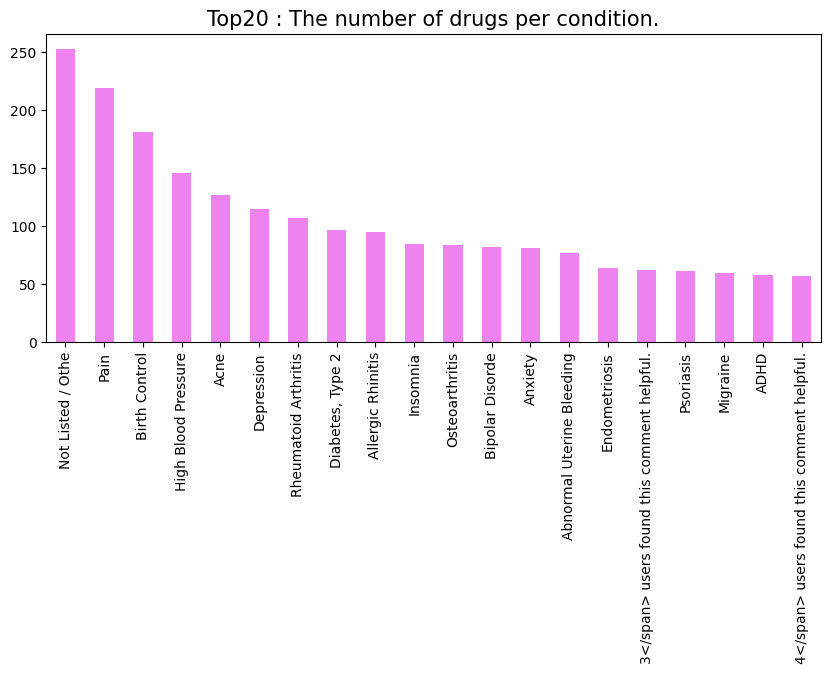

In [ ]:
condition_dn = df.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)
condition_dn[0:20].plot(kind="bar", figsize = (10,4), fontsize = 10,color="violet")
plt.xlabel("", fontsize = 15)
plt.ylabel("", fontsize = 15)
plt.title("Top20 : The number of drugs per condition.", fontsize = 15)

Text(0.5, 1.0, 'Bottom20 : The number of drugs per condition.')

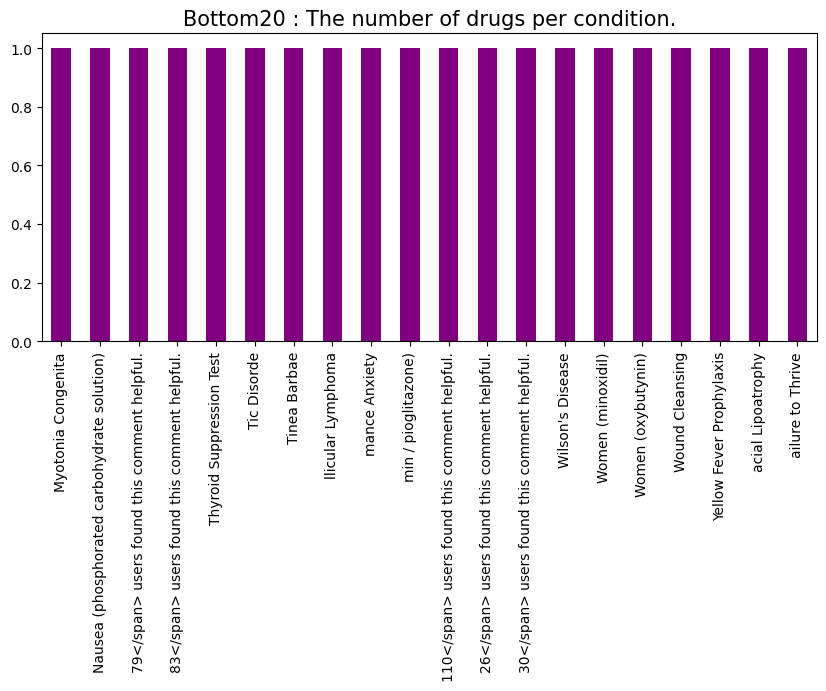

In [ ]:
condition_dn = df.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)

condition_dn[condition_dn.shape[0]-20:condition_dn.shape[0]].plot(kind="bar", figsize = (10,4), fontsize = 10,color="purple")
plt.xlabel("", fontsize = 15)
plt.ylabel("", fontsize = 15)
plt.title("Bottom20 : The number of drugs per condition.", fontsize = 15)

In [ ]:
!pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Found e

In [ ]:
df.rename(columns = {'Unnamed: 0':'user_id'}, inplace = True)


## This means that every user has given one review only.

In [ ]:
print(df['user_id'].nunique())
print(df.shape)

215063
(215063, 8)


In [ ]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['user_id', 'rating', 'usefulCount']

We have 4 categorical features : ['drugName', 'condition', 'review', 'date']


In [ ]:
df['condition'].nunique()

916

In [ ]:

unique_values = df['condition'].unique()

# Printing unique values
for value in unique_values:
    print(value)

Left Ventricular Dysfunction
ADHD
Birth Control
Opiate Dependence
Benign Prostatic Hyperplasia
Emergency Contraception
Bipolar Disorde
Epilepsy
Migraine Prevention
Depression
Crohn's Disease
Cough
Obesity
Urinary Tract Infection
ibromyalgia
Chronic Myelogenous Leukemia
HIV Infection
Insomnia
Rheumatoid Arthritis
Vaginal Yeast Infection
Chlamydia Infection
Hirsutism
Panic Disorde
Migraine
nan
Pain
Irritable Bowel Syndrome
Osteoarthritis
Constipation
Bowel Preparation
Psychosis
Muscle Spasm
Hepatitis C
Overactive Bladde
Diabetes, Type 2
Asthma, Maintenance
Non-Small Cell Lung Cance
Schizophrenia
Dysuria
Smoking Cessation
Anxiety
Acne
emale Infertility
Constipation, Acute
Constipation, Drug Induced
Erectile Dysfunction
Trigeminal Neuralgia
Underactive Thyroid
Chronic Pain
Atrophic Vaginitis
Skin and Structure Infection
Tinnitus
Major Depressive Disorde
Anxiety and Stress
Rosacea
High Blood Pressure
2</span> users found this comment helpful.
Restless Legs Syndrome
Osteolytic Bone Metastase

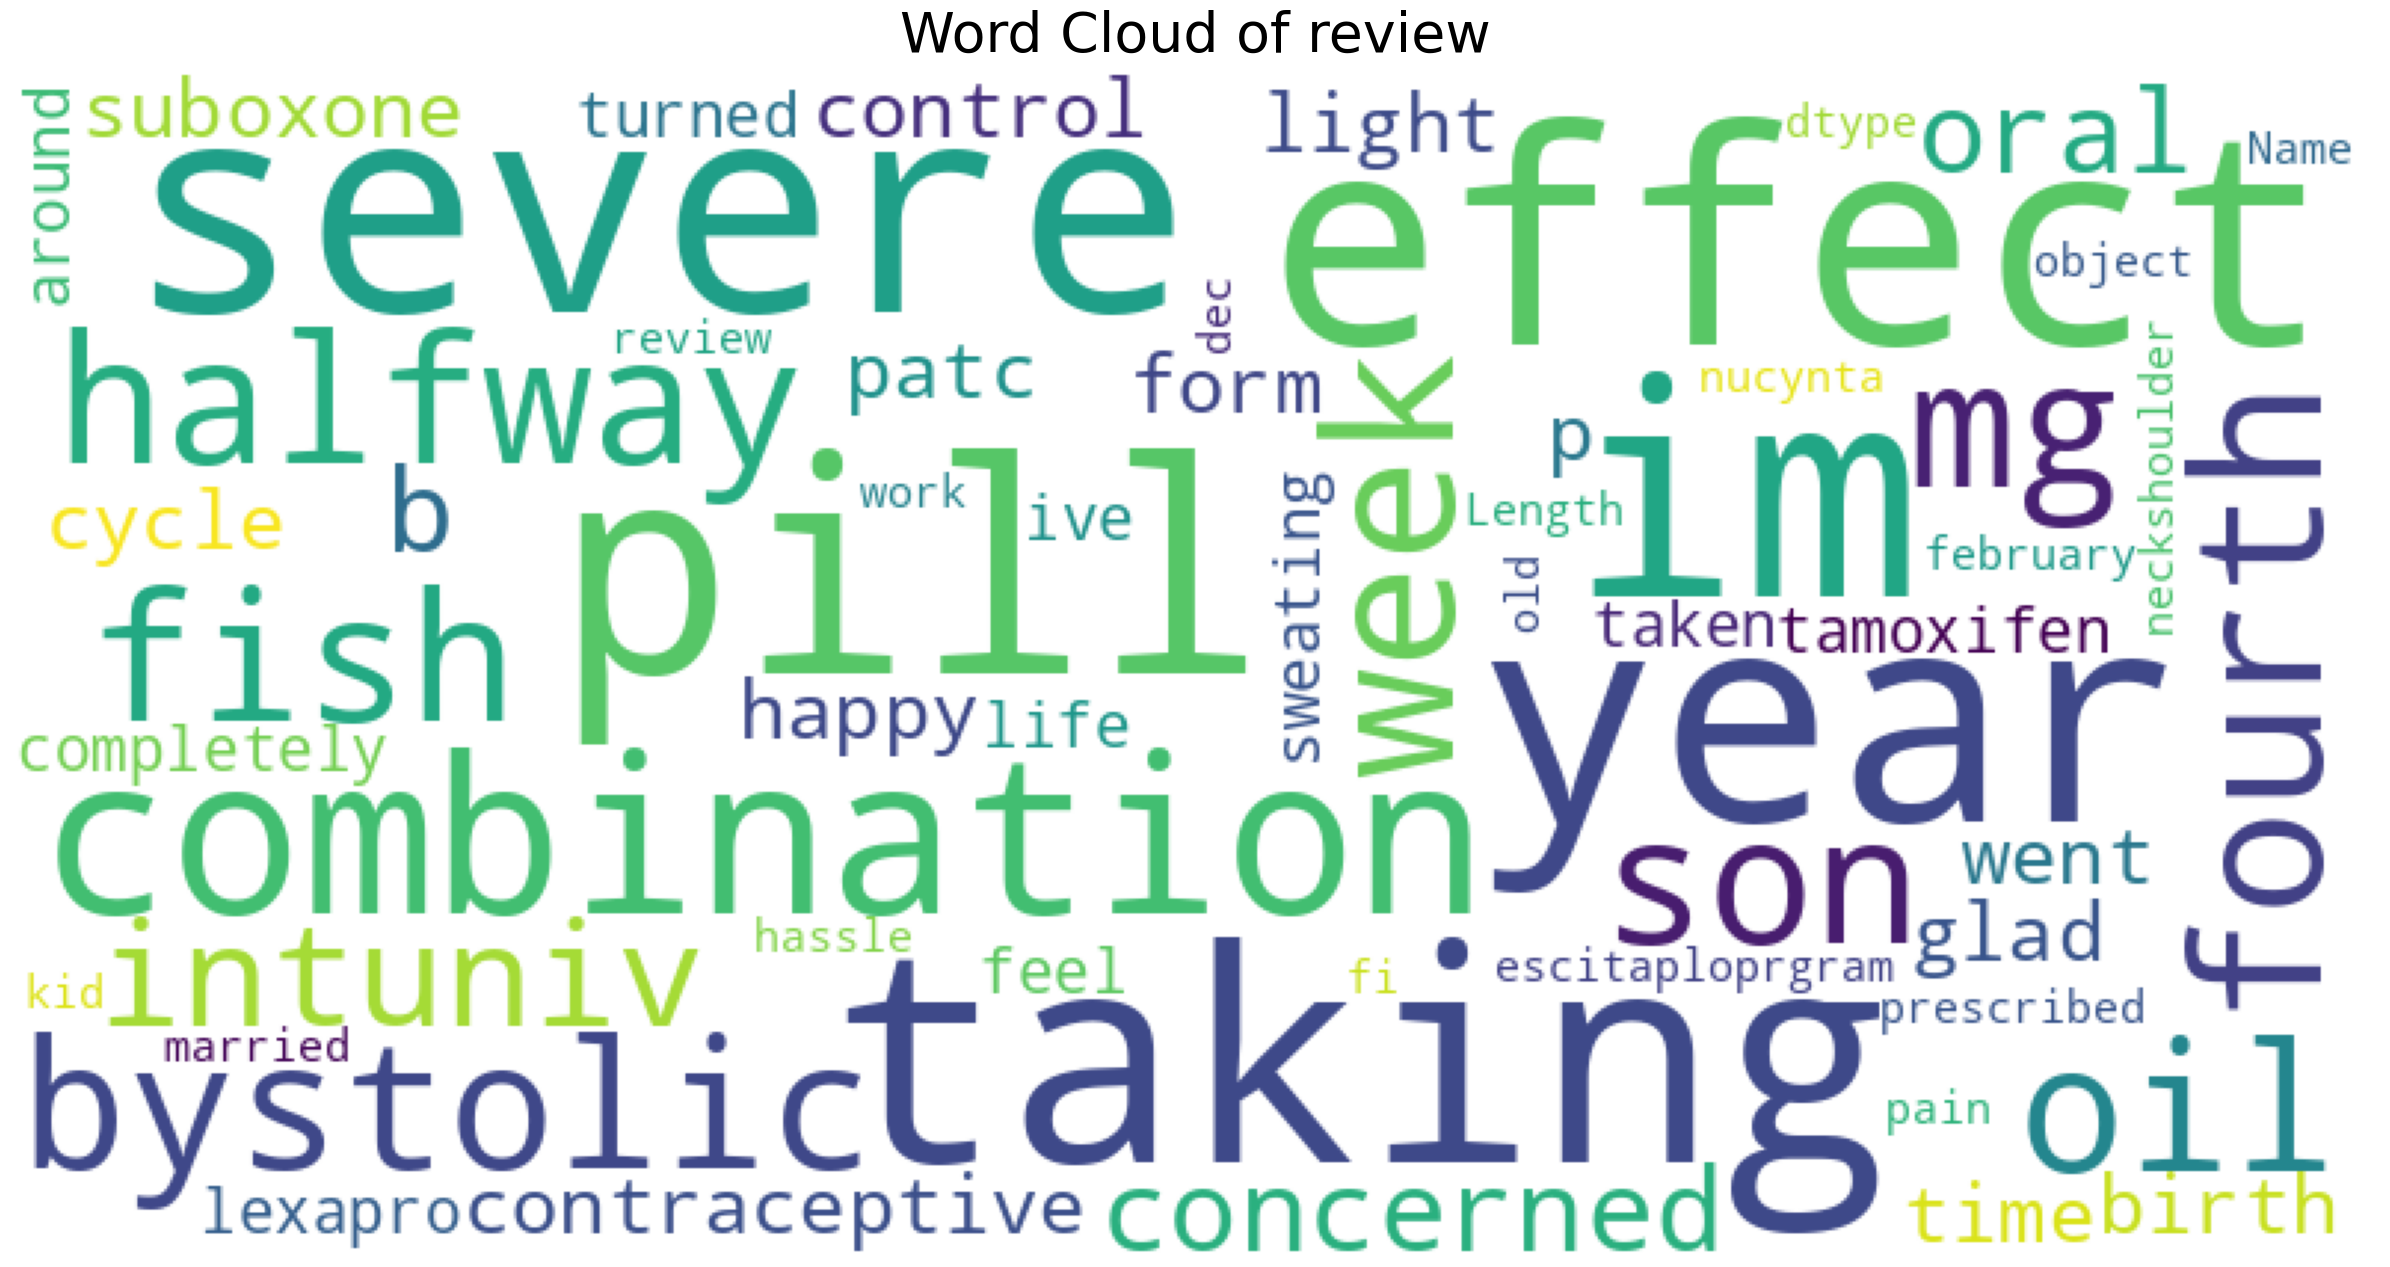

In [ ]:
from wordcloud import WordCloud, STOPWORDS

# Thanks : https://www.kaggle.com/aashita/word-clouds-of-various-shapes ##
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0),
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size,
                    random_state = 42,
                    width=800,
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))

    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black',
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()

plot_wordcloud(df["review"], title="Word Cloud of review")

Text(0.5, 1.0, 'Count of rating values')

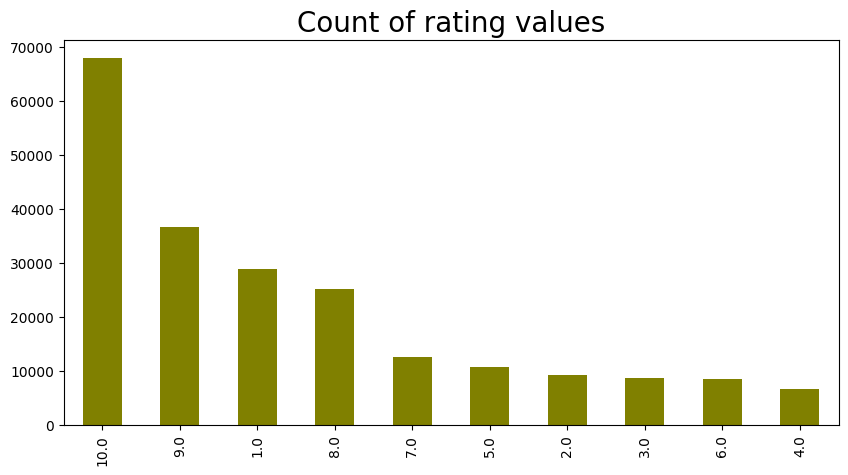

In [ ]:
rating = df['rating'].value_counts().sort_values(ascending=False)
rating.plot(kind="bar", figsize = (10,5), fontsize = 10,color="olive")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Count of rating values", fontsize = 20)

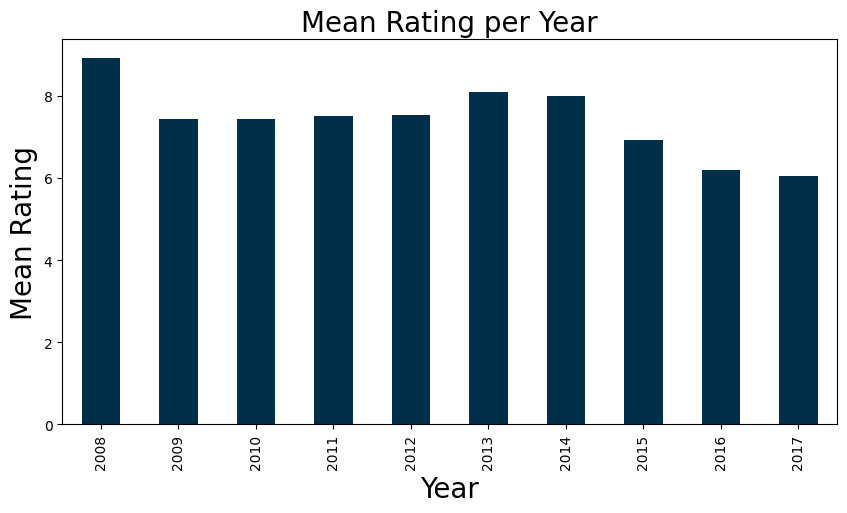

In [ ]:
df['date'] = pd.to_datetime(df['date'])

# Use .dt accessor to extract year
df['year'] = df['date'].dt.year

# Group by year and calculate mean rating
rating = df.groupby('year')['rating'].mean()

# Plotting the mean rating per year
rating.plot(kind="bar", figsize=(10,5), fontsize=10, color="#003049")
plt.xlabel("Year", fontsize=20)  # Add label for x-axis
plt.ylabel("Mean Rating", fontsize=20)  # Add label for y-axis
plt.title("Mean Rating per Year", fontsize=20)  # Add plot title

# Show the plot
plt.show()

In [ ]:
df["usefulCount"].describe()

count    215063.000000
mean         28.001004
std          36.346069
min           0.000000
25%           6.000000
50%          16.000000
75%          36.000000
max        1291.000000
Name: usefulCount, dtype: float64

In [ ]:
# Assuming df is your DataFrame containing columns 'usefulCount' and 'condition'
min = df['usefulCount'].min()
max = df['usefulCount'].max()

min_condition = df.loc[min, 'condition']
max_condition = df.loc[max, 'condition']

print(min)
print(max)

print("Condition corresponding to minimum usefulCount:", min_condition)
print("Condition corresponding to maximum usefulCount:", max_condition)

0
1291
Condition corresponding to minimum usefulCount: Left Ventricular Dysfunction
Condition corresponding to maximum usefulCount: Rhinitis


In [ ]:

condition = "Left Ventricular Dysfunction"  # Specify the condition
# Filter the DataFrame based on the condition
filtered_df = df[df['condition'] == condition]

# Extract all drugs corresponding to the condition
drugs_for_condition = filtered_df['drugName'].unique()

# Print the drugs corresponding to the condition
print("Drugs corresponding to the condition:", drugs_for_condition)

Drugs corresponding to the condition: ['Valsartan' 'Coreg' 'Metoprolol' 'Diovan' 'Carvedilol' 'Enalapril'
 'Toprol-XL' 'Benazepril' 'Vasotec']


In [ ]:
type(drugs_for_condition)

numpy.ndarray

In [ ]:
condition="Rhinitis"
# Filter the DataFrame based on the condition
filtered_df_1 = df[df['condition'] == condition]

# Extract all drugs corresponding to the condition
drugs_for_condition_1 = filtered_df['drugName'].unique()
# Print the drugs corresponding to the condition
print("Drugs corresponding to the condition:", drugs_for_condition_1)

Drugs corresponding to the condition: ['Flonase' 'Allerx Dose Pack DF' 'Fluticasone'
 'Chlorpheniramine / methscopolamine / phenylephrine' 'Dallergy'
 'Veramyst' 'Flonase Allergy Relief' 'Chlorcyclizine / phenylephrine'
 'Allergy DN PE']


Text(0.5, 1.0, 'Total Missing Value ')

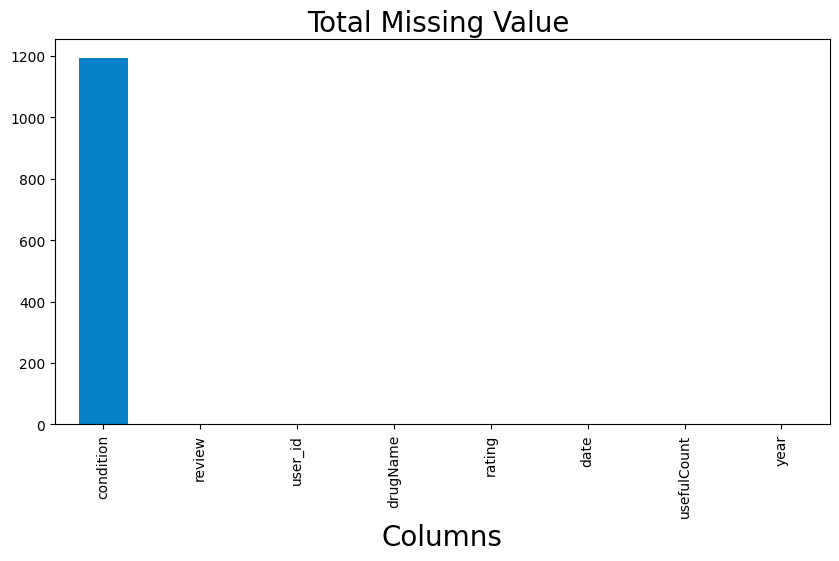

In [ ]:
percent = (df.isnull().sum()).sort_values(ascending=False)
percent.plot(kind="bar", figsize = (10,5), fontsize = 10, color='#0582ca')
plt.xlabel("Columns", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Total Missing Value ", fontsize = 20)

In [ ]:
df.head()

,user_id,drugName,condition,review,rating,date,usefulCount,year
0,206461,Valsartan,Left Ventricular Dysfunction,it effect combination bystolic mg fish oil,9.0,2012-05-20,27,2012
1,95260,Guanfacine,ADHD,my son halfway fourth week intuniv concerned b...,8.0,2010-04-27,192,2010
2,92703,Lybrel,Birth Control,i oral contraceptive pill cycle happy- light p...,5.0,2009-12-14,17,2009
3,138000,Ortho Evra,Birth Control,this time form birth control im glad went patc...,8.0,2015-11-03,10,2015
4,35696,Buprenorphine / naloxone,Opiate Dependence,suboxone completely turned life around feel he...,9.0,2016-11-27,37,2016


In [ ]:
df.shape

(215063, 8)

In [ ]:
df1 = df.dropna(axis=0)

In [ ]:
df1.shape

(213867, 8)

Text(0.5, 1.0, 'Total Missing Value ')

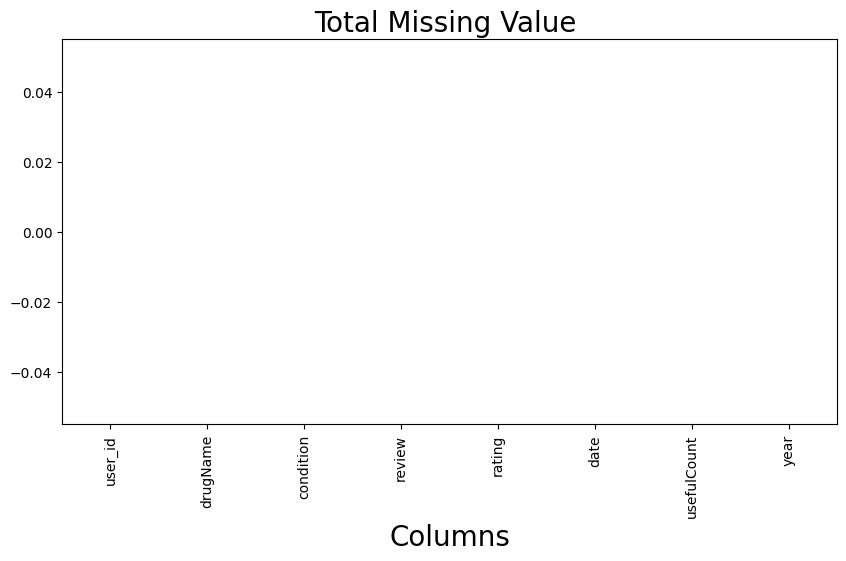

In [ ]:
percent = (df1.isnull().sum()).sort_values(ascending=False)
percent.plot(kind="bar", figsize = (10,5), fontsize = 10, color='green')
plt.xlabel("Columns", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Total Missing Value ", fontsize = 20)

### identify and collect the row indices (positions) where the substring '</span>' appears within the values of the 'condition' column in the DataFrame

In [ ]:
#df1.index refers to the index (row labels) of the DataFrame
#set(df1.index): Converts the index of df1 into a set. This will give you a unique set of all row labels (or index values) from the DataFrame
all_list = set(df1.index)
#This initializes an empty list named span_list. This list will be used to store indices (row numbers) where the string '</span>' is found within the 'condition' column of the DataFrame.
span_list = []
"""
 This is a loop that iterates over each row of the 'condition' column in the DataFrame df_all, where i is the index (row number) and j is the value
  (content of the 'condition' column) of that row.
"""
for i,j in enumerate(df1['condition']):
    if '</span>' in j:
        span_list.append(i)

### filter rows from df1 based on the absence of 'span' in the 'condition' column and resets the DataFrame index.

In [ ]:
# Calculate new_idx (as before)
new_idx = all_list.difference(set(span_list))

# Validate and filter DataFrame based on new_idx
if not new_idx:
    print("No valid indices found.")
    df_filtered = pd.DataFrame()  # Empty DataFrame
else:
    # Validate indices within the DataFrame's range
    max_index = len(df1) - 1
    valid_idx = [idx for idx in new_idx if 0 <= idx <= max_index]

    # Filter DataFrame and reset index
    df_filtered = df1.iloc[valid_idx].reset_index(drop=True)

    # Delete redundant 'index' column if needed
    if 'index' in df_filtered.columns:
        del df_filtered['index']

# Use df_filtered for further processing
print(df_filtered)


        user_id                  drugName                     condition  \
0        206461                 Valsartan  Left Ventricular Dysfunction   
1         95260                Guanfacine                          ADHD   
2         92703                    Lybrel                 Birth Control   
3        138000                Ortho Evra                 Birth Control   
4         35696  Buprenorphine / naloxone             Opiate Dependence   
...         ...                       ...                           ...   
211511   159999                 Tamoxifen     Breast Cancer, Prevention   
211512   140714              Escitalopram                       Anxiety   
211513   130945            Levonorgestrel                 Birth Control   
211514    47656                Tapentadol                          Pain   
211515   113712                 Arthrotec                      Sciatica   

                                                   review  rating       date  \
0              it e

In [ ]:
df_filtered.shape

(211516, 8)

In [ ]:
df_condition = df_filtered.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)
df_condition = pd.DataFrame(df_condition).reset_index()
df_condition.head(20)

,condition,drugName
0,Not Listed / Othe,253
1,Pain,219
2,Birth Control,181
3,High Blood Pressure,145
4,Acne,127
5,Depression,115
6,Rheumatoid Arthritis,107
7,"Diabetes, Type 2",97
8,Allergic Rhinitis,95
9,Insomnia,85


In [ ]:
# all_list = set(df_filtered.index)
# condition_list = []
# for i,j in enumerate(df_filtered['condition']):
#     for c in list(df_condition['condition']):
#         if j == c:
#             condition_list.append(i)

# new_idx = all_list.difference(set(condition_list))
# df_filtered = df_filtered.iloc[list(new_idx)].reset_index()
# del df_filtered['index']

In [ ]:
df_filtered.shape

(211516, 8)

In [ ]:
google_drive_path = '/content/drive/My Drive/eda_rs.csv'
df_filtered.to_csv(google_drive_path, index=False)
print(f"DataFrame saved successfully to: {google_drive_path}")

NameError: name 'df_filtered' is not defined

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')
google_drive_path = '//home//ayushi//Downloads//eda_rs.csv'
import pandas as pd
df_modified = pd.read_csv(google_drive_path)
print("DataFrame loaded from CSV file:")

DataFrame loaded from CSV file:


In [2]:
df_modified.shape

(211516, 8)

In [3]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.cluster import KMeans
# 
# # Text preprocessing and vectorization
# tfidf_vectorizer = TfidfVectorizer()
# tfidf_matrix = tfidf_vectorizer.fit_transform(df_modified['condition'])
# 
# # Clustering
# k = 830  # Number of clusters (you can adjust this)
# kmeans = KMeans(n_clusters=k, random_state=42)
# kmeans.fit(tfidf_matrix)
# 
# # Assign cluster labels to DataFrame
# df_modified['cluster'] = kmeans.labels_
# 
# # Count occurrences of each cluster label
# cluster_counts = {i: 0 for i in range(k)}
# for label in kmeans.labels_:
#     cluster_counts[label] += 1
# 
# # Print cluster names and counts
# for cluster_id, count in cluster_counts.items():
#     print(f"Cluster {cluster_id}: {count} values")

In [4]:
# # Find the index of the highest rated drug in each cluster
# highest_rated_drugs_index = df_modified.groupby('cluster')['rating'].idxmax()
# 
# # Extract the corresponding rows from the DataFrame
# highest_rated_drugs = df_modified.loc[highest_rated_drugs_index]
# 
# # Print the highest rated drug in each cluster
# print("Highest rated drug in each cluster:")
# for cluster_id, row in highest_rated_drugs.iterrows():
#     print(f"Cluster {row['cluster']}: {row['drugName']} (Rating: {row['rating']})")


In [ ]:
# Form clusters based on drug name within each cluster
# drug_clusters = df_modified.groupby(['cluster', 'drugName'])
# 
# # Find the average rating corresponding to each drug cluster formed within each cluster
# average_ratings = drug_clusters['rating'].mean()
# 
# # Print the average rating corresponding to each drug cluster formed within each cluster
# print("Average rating corresponding to each drug cluster within each cluster:")
# average_ratings

Average rating corresponding to each drug cluster within each cluster:


cluster  drugName                     
0        Adipex-P                          8.944444
         Adipost                           9.000000
         Alli                              6.257576
         Aplenzin                          7.000000
         Belviq                            8.171429
                                            ...    
825      Spironolactone                   10.000000
826      Clarithromycin                    5.000000
827      Nivolumab                        10.000000
828      Meningococcal group B vaccine     7.000000
829      Doxycycline                       9.000000
Name: rating, Length: 8532, dtype: float64

In [ ]:
# # Convert average_ratings Series to DataFrame
# average_ratings_df = average_ratings.reset_index()
# 
# # Print the resulting DataFrame
# print("Average ratings corresponding to each drug cluster within each cluster:")
# average_ratings_df.head(30)

Average ratings corresponding to each drug cluster within each cluster:


,cluster,drugName,rating
0,0,Adipex-P,8.944444
1,0,Adipost,9.000000
2,0,Alli,6.257576
3,0,Aplenzin,7.000000
4,0,Belviq,8.171429
5,0,Belviq XR,10.000000
6,0,Benzphetamine,8.083333
7,0,Bontril PDM,6.750000
8,0,Bontril Slow Release,7.857143
9,0,Bupropion,8.500000


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

2024-05-02 09:01:35.872897: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-02 09:01:35.873827: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-02 09:01:35.916634: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-02 09:01:36.053928: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-02 09:01:36.711787: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer

from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()

# converting all the reviews to list to pass it as a parameter to fit_on_texts
reviews_to_list = df_modified['review'].tolist()
tokenizer.fit_on_texts(reviews_to_list)

# Generating text sequences
text_sequences = tokenizer.texts_to_sequences(reviews_to_list)

In [10]:
max_words=500

In [11]:
data = pd.get_dummies(df_modified, columns = ['rating'])

# setting maximum words we want in an example


In [12]:
X = pad_sequences(text_sequences, maxlen = max_words)

In [13]:
y=data[['rating_1.0', 'rating_2.0', 'rating_3.0', 'rating_4.0',
       'rating_5.0','rating_6.0','rating_7.0','rating_8.0','rating_9.0','rating_10.0']]

In [14]:

from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [1]:
from transformers import pipeline

# Load zero-shot classification model
classifier = pipeline("zero-shot-classification")

# Define sentiment labels (optional, modify if needed)
sentiment_labels = ["Awful", "Terrible", "Not Good", "Okay", "Average", "Good", "Very Good", "Excellent", "Outstanding", "Perfect"]

# Map sentiment labels to numerical ratings (modify this if your labels have different meaning)
rating_map = {"Awful": 1, "Terrible": 2, "Not Good": 3, "Okay": 4, "Average": 5, "Good": 6, "Very Good": 7, "Excellent": 8, "Outstanding": 9, "Perfect": 10}

def predict_review_rating(text):
  # Use the classifier to predict sentiment for the review
  result = classifier(text, candidate_labels=sentiment_labels)
  # Get the predicted sentiment label
  predicted_label = result['labels'][0]
  # Use the map to convert sentiment label to rating
  rating = rating_map[predicted_label]
  return rating

reviews = [
    'awful,awful,awful medicine'
    # 'great medicine ,no side effects',
    # 'excellent medicine, would recommend',
    # 'good medicine ,cured the problem'
]

for review in reviews:
  rating = predict_review_rating(review)
  print(f"The rating for '{review}' is: {rating}")




2024-05-02 10:05:26.245229: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-02 10:05:26.246204: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-02 10:05:26.291256: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-02 10:05:26.452696: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-02 10:05:27.300661: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

The rating for 'awful,awful,awful medicine' is: 3


In [24]:
# matrix_df = pd.read_csv("/content/drive/MyDrive/Details.csv", index_col=0)
google_drive_path = '//home//ayushi//Downloads//Details.csv'
import pandas as pd
matrix_df = pd.read_csv(google_drive_path,index_col=0)
print("DataFrame loaded from CSV file:")

DataFrame loaded from CSV file:


In [25]:
matrix_df

,A + D Cracked Skin Relief,A / B Otic,Abacavir / dolutegravir / lamivudine,Abacavir / lamivudine / zidovudine,Abatacept,Abilify,Abilify Discmelt,Abilify Maintena,Abiraterone,AbobotulinumtoxinA,...,Zyprexa Zydis,Zyrtec,Zyrtec-D,Zyrtec-D 12 Hour,Zytiga,Zyvox,ZzzQuil,depo-subQ provera 104,ella,femhrt
condition,,,,,,,,,,,,,,,,,,,,,
0</span> users found this comment helpful.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
10</span> users found this comment helpful.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110</span> users found this comment helpful.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11</span> users found this comment helpful.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121</span> users found this comment helpful.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
unctional Gastric Disorde,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ungal Infection Prophylaxis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ungal Pneumonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
rating

3

In [41]:
medicine ="Catapres"
condition = "ADHD"
matrix_df.loc[condition,medicine]

9.333333333333334

In [42]:
medicine ="Catapres"
condition = "ADHD"
matrix_df.loc[condition,medicine] += rating / matrix_df.loc[condition].count()

print("Top 5 medicines for", condition, "are:")
sorted_row = matrix_df.loc[condition].sort_values(ascending=False)
top_medicines = sorted_row.head(6)
print(top_medicines)



Top 5 medicines for ADHD are:
Selegiline    10.000000
ProCentra     10.000000
Desoxyn        9.562500
Cylert         9.500000
Pemoline       9.500000
Catapres       9.387879
Name: ADHD, dtype: float64
